# HAENSEL-AMS Challenge

### 1. Importing Libraries

In [1]:
#importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading Dataset and Checking the Data

In [2]:
df = pd.read_csv('sample.csv',header = None, skipinitialspace = True ) # assuming here data is in the working directory.

In [3]:
df.shape

(66137, 296)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66137 entries, 0 to 66136
Columns: 296 entries, 0 to 295
dtypes: float64(4), int64(291), object(1)
memory usage: 149.4+ MB


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
0,0,0,0,20000.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,259.227165,B
1,0,0,0,7059.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,271.983584,E
2,0,0,0,3150.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,235.233437,D
3,0,0,0,24000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,415.104389,C
4,0,0,0,5600.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,462.230610,D


In [6]:
# are there any constant columns? 11 cols are constant, store indices to drop in data cleaning step.

df_unique = df.loc[:,df.apply(pd.Series.nunique) != 1].columns
print(df_unique.shape)
const_cols = set(df.columns)-set(df_unique)
print(const_cols)


(285,)
{268, 269, 270, 271, 272, 273, 274, 179, 275, 276, 59}


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,285,286,287,288,289,290,291,292,293,294
count,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,...,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000,66137.000000
mean,0.004249,0.014757,0.003765,11226.207294,0.213511,0.049261,0.869498,0.030588,0.005867,0.004249,...,0.011522,0.002646,0.007258,0.007031,0.002933,0.257269,0.257934,0.179552,0.305245,454.969820
std,0.065044,0.120581,0.061244,8153.148240,0.609365,0.216415,0.336857,0.172200,0.076369,0.065044,...,0.106719,0.051372,0.084883,0.083556,0.054081,0.437132,0.437501,0.383816,0.460515,221.293898
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.525593
25%,0.000000,0.000000,0.000000,4000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.863033
50%,0.000000,0.000000,0.000000,9614.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.698119
75%,0.000000,0.000000,0.000000,18984.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,575.044994
max,1.000000,1.000000,1.000000,72360.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2922.908791


In [8]:
# 291 columns are int and the majority appear to be binary. How many columns are binary? 

bin_cols = [col for col in df.drop(295, axis=1) 
             if df.drop(295, axis=1)[col].dropna().value_counts().index.isin([0,1]).all()]
len(bin_cols)


288

In [9]:
# 288 columns are binary and indices are stored in bin_cols. Which columns are not binary ?

nonbin_cols = set(df.drop(295, axis=1).columns) - set(bin_cols)
nonbin_cols

{3, 4, 23, 36, 43, 64, 294}

In [10]:
# What are the indices of the columns that are floats?

float_cols = df.loc[:, df.dtypes == float].columns

In [11]:
#What is the distribution of these non-binary columns/attributes?

df.loc[:,nonbin_cols].describe()

,64,3,4,36,294,43,23
count,66137.000000,66137.000000,66137.000000,6.613700e+04,66137.000000,66137.000000,66137.000000
mean,451.009060,11226.207294,0.213511,7.810669e+01,454.969820,9.611529,-0.981085
std,226.386943,8153.148240,0.609365,8.038195e+03,221.293898,4.687150,0.416764
min,30.000000,13.000000,0.000000,-3.620000e+02,64.525593,0.180000,-1.000000
25%,296.000000,4000.000000,0.000000,1.000000e+00,300.863033,5.600000,-1.000000
50%,429.000000,9614.800000,0.000000,1.000000e+00,424.698119,11.200000,-1.000000
75%,581.000000,18984.000000,0.000000,1.000000e+00,575.044994,13.600000,-1.000000
max,2833.000000,72360.000000,10.000000,1.460971e+06,2922.908791,31.000000,31.000000


In [12]:
# does the data have any missing data in the form of nans?

df.dropna().shape

(66137, 296)

In [16]:
# What is the representation of each target class in the data?

df[295].value_counts()


C    46882
D     9279
B     6602
E     2507
A      867
Name: 295, dtype: int64

In [17]:
# What is the representation of each target class in the data in percentage?

(df[295].value_counts()/df.shape[0])*100

C    70.886191
D    14.029968
B     9.982309
E     3.790616
A     1.310915
Name: 295, dtype: float64

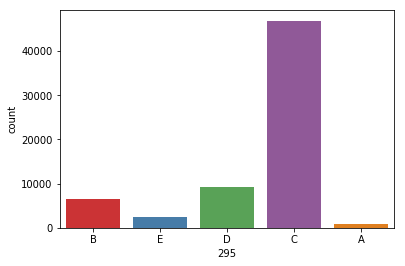

In [18]:
# Plotting the distribution of target classes

sns.countplot(x=df[295], data=df, palette='Set1')

** From the above data check the following observations can be stated:**

- The data has no missing values in the form of NaNs.
- There are eleven constant columns. These will be dropped in the data cleaning step.
- The vast majority (288/295) of the attributes columns are binary. This can be because the columns represent dummy variables
  of categorical attributes or because they represent pixels of a black and white image(The binary columns only).
- There are four real-number/float attributes. Their distribution for every target class should be checked.
- There are 3 non-binary integer attributes. Their distributions suggest they have extreme outliers. This must
  be further investigated in the EDA step.
- The response classes A to E are very unbalanced, with class C appearing in more than 70% of the instances. This is expected
  to affect the performance of ML models. 

### 3. Exploratory Data Analysis and Data Cleaning

In [19]:
# Taking another look at the distribution of the non-binary columns

df.loc[:,(3,4,23,36,43,64,294)].describe()

,3,4,23,36,43,64,294
count,66137.000000,66137.000000,66137.000000,6.613700e+04,66137.000000,66137.000000,66137.000000
mean,11226.207294,0.213511,-0.981085,7.810669e+01,9.611529,451.009060,454.969820
std,8153.148240,0.609365,0.416764,8.038195e+03,4.687150,226.386943,221.293898
min,13.000000,0.000000,-1.000000,-3.620000e+02,0.180000,30.000000,64.525593
25%,4000.000000,0.000000,-1.000000,1.000000e+00,5.600000,296.000000,300.863033
50%,9614.800000,0.000000,-1.000000,1.000000e+00,11.200000,429.000000,424.698119
75%,18984.000000,0.000000,-1.000000,1.000000e+00,13.600000,581.000000,575.044994
max,72360.000000,10.000000,31.000000,1.460971e+06,31.000000,2833.000000,2922.908791


In [11]:
# renaming the non-binary columns for easy reference

df=df.rename(columns = {295:'response', 3:'float1', 43:'float2', 64:'float3', 294:'float4'})

In [12]:
df=df.rename(columns = {4:'col4', 23:'col23', 36:'col36'})

In [22]:
df.head()

,0,1,2,float1,col4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,float4,response
0,0,0,0,20000.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,259.227165,B
1,0,0,0,7059.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,271.983584,E
2,0,0,0,3150.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,235.233437,D
3,0,0,0,24000.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,415.104389,C
4,0,0,0,5600.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,462.230610,D


57287

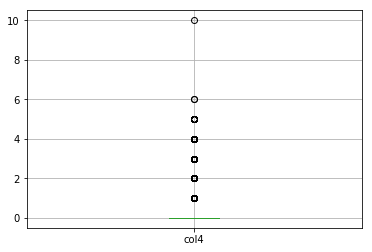

In [23]:
# Checking col4's distribution: It is mostly equal to 0 (87% of the time) with outliers between 1 and 10

df.boxplot(column='col4')
len(df[df['col4']==0].col4)

(57287, 296)


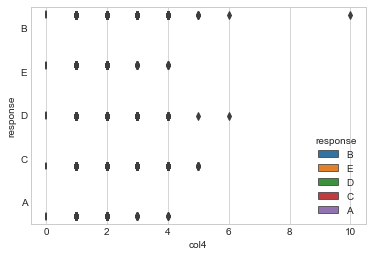

In [24]:
# Plotting the distribution of col4 per target class. I think it should be dropped since outliers are in all classes.

sns.set_style("whitegrid")
print(df[df['col4'] == 0].shape)
sns.boxplot(x='col4', y='response', hue='response', data=df)

65880

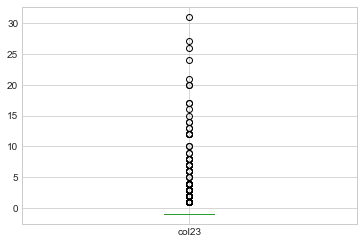

In [33]:
# Checking col23's distribution: It is almost constant at -1 (99.6% of the time)

df.boxplot(column='col23')
len(df[df['col23']== -1].col23)


(65880, 296)


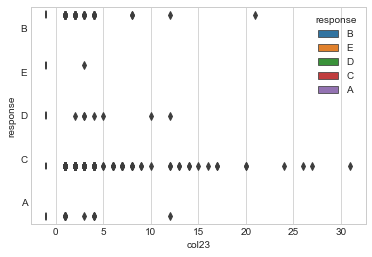

In [35]:
# Plotting the distribution of col23 per target class. I think it should be dropped as well for the same reason as col4.

print(df[df['col23'] == -1].shape)
sns.boxplot(x='col23', y='response', hue='response', data=df)

41895
11162


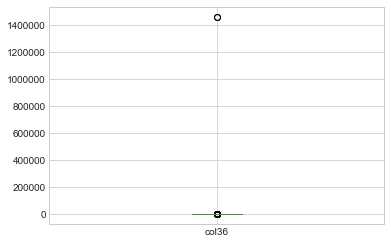

In [47]:
# Checking col36's distribution: There is an extreme positive outlier(s) that is messing the scale. 

df.boxplot(column='col36')
print(len(df[df['col36']== 1].col36))
print(len(df[df['col36']== 0].col36))

(66135, 296)
(65155, 296)
(7, 296)


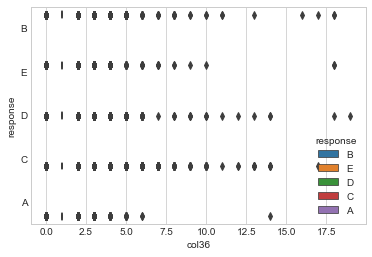

In [25]:
# Plotting the distribution of col36 per target class. The column takes binary values 80% of the time. It took a few 
# iterations to see that the remaining 20% is distributed between 0 and 20 and 1.5 % is extreme values. 
# Not knowing what the attribute is and whether it is really binary or not, I will only trim/drop the extreme outliers 
# so as not to negatively impact normalizing/rescaling this column.

print(df[df['col36'] < 20000].shape)
print(df[df['col36'] < 20].shape)
print(df[df['col36'] < 0].shape)
sns.boxplot(x='col36', y='response', hue='response', data=df[(df['col36'] < 20) & (df['col36'] >= 0)]) 

(66133, 296)


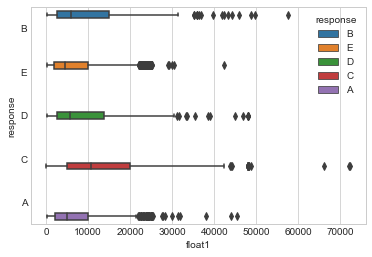

In [49]:
# Plotting the distributions of the float1 attribute

sns.boxplot(x='float1', y='response', hue='response', data=df)
print(df[df['float1'] < 50000].shape)

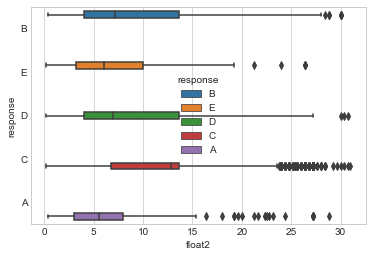

In [129]:
sns.boxplot(x='float2', y='response', hue='response', data=df)

(65954, 296)


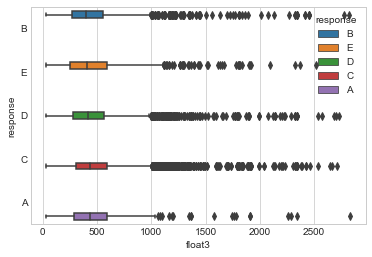

In [50]:
sns.boxplot(x='float3', y='response', hue='response', data=df)
print(df[df['float3'] < 1500].shape)

(65870, 296)


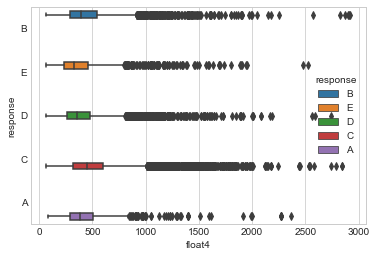

In [51]:
sns.boxplot(x='float4', y='response', hue='response', data=df)
print(df[df['float4'] < 1500].shape)

In [ ]:
#In all four float columns, there are outliers. However, I think not knowing the nature of the attributes I will keep all the
# data for these columns, especially that there are no outliers orders of magnitude greater than the mean as in col36 for 
# example.

In [53]:
# Are the float attributes correlated?

float_df=df[['float1','float2','float3','float4','response']]

In [54]:
float_df.sample(10)

,float1,float2,float3,float4,response
15463,7434.0,8.4,347.000,413.641383,D
22064,24000.0,13.6,347.000,396.543532,D
61817,900.0,0.4,255.650,186.618126,C
20891,22852.1,10.8,384.000,450.516772,B
289,20500.0,7.1,818.000,812.137386,C
30548,9600.0,13.6,898.000,1210.494795,C
24149,23792.0,12.0,523.000,583.476989,C
35386,287.0,1.6,52.422,89.743534,D
52238,24720.0,9.6,521.379,588.651642,D
52914,1225.0,3.5,523.000,250.519304,C


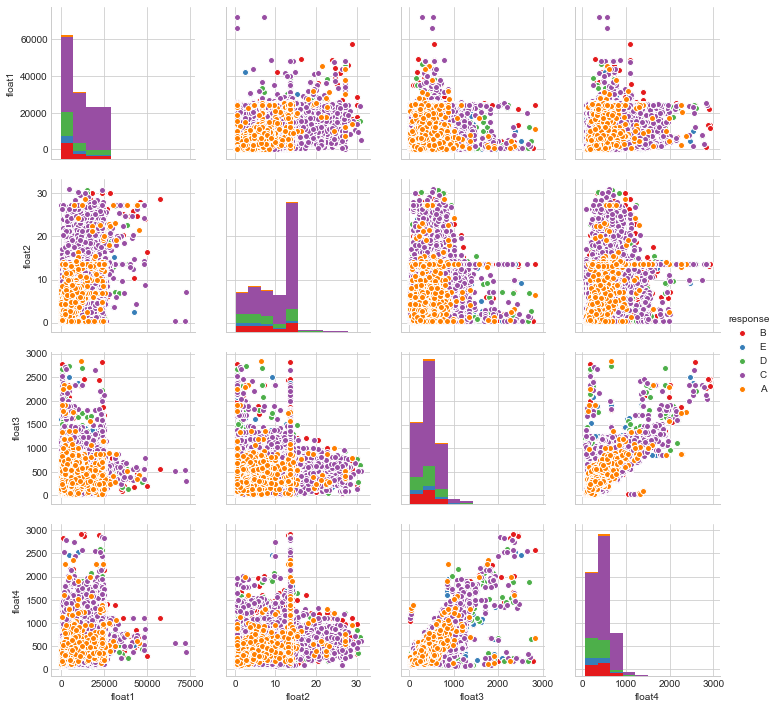

In [55]:
plt.figure(figsize=(8,6))
sns.pairplot(float_df,hue='response',palette='Set1')

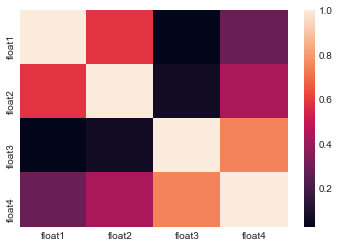

In [56]:
# Atrributes float1 and float2 are moderately correlated, while float3 and float4 are strongly correlated.

sns.heatmap(float_df.corr())

In [13]:
# Cleaning the data. Now df contains the cleaned data.

df.drop(const_cols, axis=1, inplace=True)
df.drop(['col4', 'col23'], axis=1, inplace=True)
df=df[(df['col36'] < 20) & (df['col36'] >= 0)]
df.shape

(65148, 283)

### 4. Building ML Models

** Performance Evaluation/Validation Metrics: Due to the target classes representation imbalance in the data, the following models are evaluated based on their Confusion Matrix and F1-score. **

- The **Confusion Matrix** will show how each model is performing in terms of identifying/predicting each class as opposed to accuracy, which can just reflect the underlying imbalanced distribution of the classes. 

- The **average F1-score** is the weighted average of the Precision and Recall (sensitivity), and hence is more descriptive of the model performance, assuming that the cost of a false positive and a false negative are equal.


### 4.1 Random Forest

** To get a base model for the data, Random Forest is used because:**

- RF can work with a mix of binary and float attributes without the need to standardize/scale the attributes.
- RF can work with the relatively large number of attributes without applying dimensionality reduction first.
- RF is robust against correlated attributes, which are present in this data, at for the float attributes.

In [14]:
# Splitting the data to test and training

from sklearn.model_selection import train_test_split

X = df.drop('response', axis=1)
y = df['response']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [30]:
# Importing RF classifier and creating an instant with number of estimators set to 100. I will not assign weights to classes
# in this step to get a base model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
#rfc.fit(X_train, y_train)

In [31]:
# Fitting the model

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
# Predicting off the test set and printing metrics. 

rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[    3    18   200    19     1]
 [    6   103  1729    82     6]
 [    3   129 13456   343    18]
 [    3    63  2318   279    21]
 [    1    10   630    74    30]]
             precision    recall  f1-score   support

          A       0.19      0.01      0.02       241
          B       0.32      0.05      0.09      1926
          C       0.73      0.96      0.83     13949
          D       0.35      0.10      0.16      2684
          E       0.39      0.04      0.07       745

avg / total       0.62      0.71      0.63     19545



In [34]:
# The obtained model has a good Presicion and Recall for Class C, the majority class. However, the performance for the other 
# classes is very bad, which is expected as a result of the class imbalance especially for class E and A.

# I will try again, but with the attribute class_weight set to "balanced" mode, which uses the values of y_train to automatically
# adjust weights inversely proportional to class frequencies in the input data.

# The second model did not provide any enhancement, but was 1% worse in terms if the average F1-score.

rfc = RandomForestClassifier(n_estimators=100, class_weight="balanced")
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[    2    16   210    12     1]
 [    4    97  1762    57     6]
 [   10   151 13451   316    21]
 [    2    51  2377   234    20]
 [    2     9   642    63    29]]
             precision    recall  f1-score   support

          A       0.10      0.01      0.02       241
          B       0.30      0.05      0.09      1926
          C       0.73      0.96      0.83     13949
          D       0.34      0.09      0.14      2684
          E       0.38      0.04      0.07       745

avg / total       0.61      0.71      0.62     19545



### 4.2 K-Nearest Neighbor

** KNN will be applied to the data after standardizing (z-score) all the attributes. The tunable parameter K is set initially to 10. KNN has the advantage of being a simple ML technique with low computational complexity. Hence it can be used to train relatively large and high dimensional datasets that grows progressively over time. However, its downside is that it is expensive in terms of memory since the trained model is represented by the entire dataset.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

# scaling data so that all attributes have zero mean and unit std. This step is vital for KNN since 5 of the attributes have much
# larger ranges and variances than the binary attributes.
scaled_df = scale(df.drop('response', axis=1))

In [38]:
X = scaled_df
y = df['response']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [39]:
# Fitting the model

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [40]:
# Predicting off the test test and printing metrics

pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[    2    11   215    13     0]
 [    2    96  1771    57     0]
 [    2   225 13456   254    12]
 [    3    88  2444   142     7]
 [    3    34   655    43    10]]
             precision    recall  f1-score   support

          A       0.17      0.01      0.02       241
          B       0.21      0.05      0.08      1926
          C       0.73      0.96      0.83     13949
          D       0.28      0.05      0.09      2684
          E       0.34      0.01      0.03       745

avg / total       0.59      0.70      0.61     19545



### 4.3. Principal Component Analysis + Support Vector Machine Model

** The next classifier I will try is Support Vector Machine. Due to the relatively high number of attributes (and also records)
PCA will be used to reduce the dimensions of the data before applying SVM.**

In [16]:
# Splitting the data

X = scaled_df
y = df['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=281) # we are getting all the principal components first to then see how many to use later before SVM,
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=281, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
# Now checking to see the amount of variance the addition of each PC explains

var= pca.explained_variance_ratio_
var_cs=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_cs)

[  1.81   3.3    4.57   5.73   6.78   7.79   8.69   9.56  10.4   11.24
  12.04  12.83  13.6   14.36  15.1   15.84  16.56  17.28  17.98  18.66
  19.31  19.95  20.58  21.19  21.79  22.37  22.94  23.5   24.05  24.58
  25.1   25.62  26.13  26.64  27.15  27.65  28.14  28.63  29.12  29.6
  30.08  30.55  31.02  31.48  31.94  32.4   32.85  33.3   33.74  34.18
  34.62  35.06  35.5   35.93  36.36  36.78  37.2   37.62  38.04  38.46
  38.87  39.28  39.69  40.1   40.51  40.92  41.32  41.72  42.12  42.52
  42.92  43.32  43.72  44.12  44.52  44.91  45.3   45.69  46.08  46.47
  46.86  47.25  47.64  48.03  48.42  48.8   49.18  49.56  49.94  50.32
  50.7   51.08  51.46  51.84  52.22  52.6   52.98  53.36  53.74  54.11
  54.48  54.85  55.22  55.59  55.96  56.33  56.7   57.07  57.44  57.81
  58.18  58.55  58.92  59.29  59.66  60.02  60.38  60.74  61.1   61.46
  61.82  62.18  62.54  62.9   63.26  63.62  63.98  64.34  64.7   65.06
  65.42  65.78  66.13  66.48  66.83  67.18  67.53  67.88  68.23  68.58
  68.93

In [19]:
# The rate of increase in the amount of total variation explained with PCs is slow. 
# I will take a number of PCs that explains 80% of the variation

pca = PCA(n_components=.80, svd_solver='full') 
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca.shape

(45603, 174)

In [20]:
# so we reduced the dimensions here by almost 40%. I suspect that 45K records of 174 attributes will be too computationally 
# expensive to run in a reasonable time using SVM but I will try.
# applying PCA to test data

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(19545, 174)


In [21]:
# importing SVM and creating an SVM instance, first without class_weight set to "balanced"

from sklearn.svm import SVC

svc_model = SVC()

In [22]:
# fitting the model

svc_model.fit(X_train_pca,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# Predicting off the the test set

predictions = svc_model.predict(X_test_pca)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[    1     4   233     3     0]
 [    1    37  1881     7     0]
 [    0    30 13850    68     1]
 [    0     7  2631    45     1]
 [    0     0   725    19     1]]
             precision    recall  f1-score   support

          A       0.50      0.00      0.01       241
          B       0.47      0.02      0.04      1926
          C       0.72      0.99      0.83     13949
          D       0.32      0.02      0.03      2684
          E       0.33      0.00      0.00       745

avg / total       0.62      0.71      0.60     19545



In [108]:
# importing SVM and creating an SVM instance with class_weight set to "balanced".

svc_model = SVC(class_weight="balanced")

In [109]:
# fitting the SVM model

svc_model.fit(X_train_pca,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
# Predicting off the the test set

predictions = svc_model.predict(X_test_pca)

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[  19   86   32   61   43]
 [ 115  610  450  514  237]
 [ 492 2223 7726 2551  957]
 [ 169  568  546  989  412]
 [  49  147   93  260  196]]
             precision    recall  f1-score   support

          A       0.02      0.08      0.04       241
          B       0.17      0.32      0.22      1926
          C       0.87      0.55      0.68     13949
          D       0.23      0.37      0.28      2684
          E       0.11      0.26      0.15       745

avg / total       0.68      0.49      0.55     19545



** Compared to the RF Model, the average F1-score is 8% worse. However, the F1-score of the underepresented classes improved 
   significantly, except for class A which has only 1% representation. The next steps can be:**
   
   - Perform a Grid Search for tuning the parameters C and gamma for the higest f1 score. However, this is computationally 
     very expensive with this number of attributes and records. This would be the code for this:
     
     - #param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
     - #from sklearn.model_selection import GridSearchCV
     - #grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3, scoring= ['f1_weighted','f1_sampled'])
     - #grid.fit(X_train_pca,y_train)
     - #grid.best_params_
     - #grid.best_estimator_
     - #grid_predictions = grid.predict(X_test_pca)
     - #print(confusion_matrix(y_test,grid_predictions))
     - #print(classification_report(y_test,grid_predictions))
   
   
   - Before splitting the data and applying PCA, a RandomUnderSampler from the imblearn can be applied to the data.
     Since class A is the least represented in the data with around 800 instances, the data after balancing out with random
     undersampling will shrink siginifantly to achieve a 1:1:1:1:1 default ratio. PCA is then applied and the GridSearch for 
     tuning SVM parameters C and gamma can be used. The following is the code lines to be added before fitting PCA:
    
    - #from imblearn.under_sampling import RandomUnderSampler
    - #rus = RandomUnderSampler(random_state=101)
    - #X_res, y_res = rus.fit_sample(X, y)
   
   

### 4.3 Artificial Neural Network

In [25]:
df_copy = df.copy()

In [26]:
# importing libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

C:\Users\Dina\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
# encoding target classes as integers and then hot-one encoding

# Encode as integers from 0 to 4
encoder = LabelEncoder()
encoder.fit(df['response'])
encoded_Y = encoder.transform(df['response'])

# convert integers to dummy variables (i.e. one hot encoded)
y_nn = np_utils.to_categorical(encoded_Y)

In [29]:
#Scaling non-binary columns to the range (0,1). This will not affect the values in the binary columns.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=df.drop(['response'], axis=1)
X_nn = scaler.fit_transform(X)

In [78]:
# Now the all  the attributes columns contain floats between 0 and 1

pd.DataFrame(X_nn).head()

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
0,0.0,0.0,0.0,0.276266,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.067195
1,0.0,0.0,0.0,0.097392,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.071663
2,0.0,0.0,0.0,0.043360,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.058793
3,0.0,0.0,0.0,0.331555,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.121783
4,0.0,0.0,0.0,0.227985,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.265157


In [30]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.30, random_state=101) 

In [31]:
X_train.shape

(45603, 282)

In [32]:
# Defining the base model, which is the input for the KerasClassifier we will create in the next step. 
# The base model defines the topology of the ANN: 
# - 1 hidden layer layer with 80 perceptrons (according to the formula rule of thumb --> Nh= Nt(=45603)/2*(Ni(=282)+No(=5))). 
#   RELU (rectifier) function is used for perceptron activation.
# - Ouput layer with 5 perceptrons, 1 for each target class. A SoftMax function is used to match the one-hot o/p encoding.
# - Adam gradient descent optimization algorithm is used
# - A Cross-Entropy function is used as the error/loss measure.

from keras import metrics
def baseline_model():
    model = Sequential()
    model.add(Dense(80, input_dim=282, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', metrics.categorical_accuracy])
    return model

In [33]:
# creating an instance of the KerasClassifier. Inputs are:
# - Defined baseline_model
# - Number of iterations/epochs to run. 
# - batch size. For the size of training data we have 200 is chosen

estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=200, verbose=1)

In [34]:
estimator.fit(X_train, y_train)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/100
45603/45603 [==============================] - 6s 140us/step - loss: 0.9361 - acc: 0.6928 - categorical_accuracy: 0.6928
Epoch 2/100
45603/45603 [==============================] - 1s 32us/step - loss: 0.8453 - acc: 0.7118 - categorical_accuracy: 0.7118
Epoch 3/100
45603/45603 [==============================] - 2s 35us/step - loss: 0.8316 - acc: 0.7118 - categorical_accuracy: 0.7118
Epoch 4/100
45603/45603 [==============================] - 1s 33us/step - loss: 0.8210 - acc: 0.7128 - categorical_accuracy: 0.7128
Epoch 5/100
45603/45603 [==============================] - 2s 33us/step - loss: 0.8108 - acc: 0.7131 - categorical_accuracy: 0.7131
Epoch 6/100
45603/45603 [==============================] - 2s 34us/step - loss: 0.8013 - acc: 0.7143 - categorical_accuracy: 0.7143
Epoch 7/100
45603/45603 [==============================] - 2s

45603/45603 [==============================] - 2s 35us/step - loss: 0.6066 - acc: 0.7765 - categorical_accuracy: 0.7765
Epoch 58/100
45603/45603 [==============================] - 1s 32us/step - loss: 0.6040 - acc: 0.7768 - categorical_accuracy: 0.7768
Epoch 59/100
45603/45603 [==============================] - 2s 35us/step - loss: 0.6024 - acc: 0.7781 - categorical_accuracy: 0.7781
Epoch 60/100
45603/45603 [==============================] - 1s 31us/step - loss: 0.5985 - acc: 0.7795 - categorical_accuracy: 0.7795
Epoch 61/100
45603/45603 [==============================] - 2s 35us/step - loss: 0.5974 - acc: 0.7791 - categorical_accuracy: 0.7791
Epoch 62/100
45603/45603 [==============================] - 2s 33us/step - loss: 0.5944 - acc: 0.7814 - categorical_accuracy: 0.7814
Epoch 63/100
45603/45603 [==============================] - 1s 32us/step - loss: 0.5935 - acc: 0.7819 - categorical_accuracy: 0.7819
Epoch 64/100
45603/45603 [==============================] - 2s 33us/step - loss: 0

In [35]:
predictions = estimator.predict(X_test)

19545/19545 [==============================] - 0s 15us/step


In [36]:
predictions_label = encoder.inverse_transform(predictions)
y_test_int = np.argmax(y_test,1)
y_test_label = encoder.inverse_transform(y_test_int)

C:\Users\Dina\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dina\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
print(confusion_matrix(y_test_label,predictions_label))

print(classification_report(y_test_label,predictions_label))

[[    7    46   136    43     9]
 [   23   258  1360   241    44]
 [   46   621 12230   932   120]
 [   21   205  1856   532    70]
 [   12    73   438   163    59]]
             precision    recall  f1-score   support

          A       0.06      0.03      0.04       241
          B       0.21      0.13      0.16      1926
          C       0.76      0.88      0.82     13949
          D       0.28      0.20      0.23      2684
          E       0.20      0.08      0.11       745

avg / total       0.61      0.67      0.64     19545



In [38]:
# The model performed in terms of average f1-score the same as the base model with RF. Next Steps can be:

# - Tune parameters of the ANN further: number of training epochs and number of perceptrons in hidden layer.
# - Add another hidden layer. This may improve performance but will be difficult to train.
# - Address class imbalance by using a random under sampler

In [39]:
# I will try the thrid option here, which is to under sample and then repeat training and testing.

from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=101)
X = df.drop('response', axis = 1)
y = df['response']
X_res, y_res = rus.fit_sample(X, y)
dfy_res = pd.DataFrame(y_res)
dfy_res[0].value_counts()

C    834
E    834
D    834
B    834
A    834
Name: 0, dtype: int64

In [40]:
# Now we have a balanced data set of 4170 records and 282 attributes.

# Repeating prepping the inputs to the ANN and splitting the data
encoder = LabelEncoder()
encoder.fit(y_res)
encoded_Y = encoder.transform(y_res)

# convert integers to dummy variables (i.e. one hot encoded)
y_nn = np_utils.to_categorical(encoded_Y)

#Scaling non-binary columns to the range (0,1). This will not affect the values in the binary columns.

scaler = MinMaxScaler()
X_nn = scaler.fit_transform(X_res)

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.30, random_state=101) 

X_train.shape

(2919, 282)

In [41]:
# using the same ANN model, we train and test. 
# The resulting performance was an f1-score of 0.28. This is because the ANN overfitted on the training data (acurracy 0.9884)
# and hence did not learn the classes properly.

estimator.fit(X_train, y_train)

predictions = estimator.predict(X_test)

predictions_label = encoder.inverse_transform(predictions)
y_test_int = np.argmax(y_test,1)
y_test_label = encoder.inverse_transform(y_test_int)

print(confusion_matrix(y_test_label,predictions_label))

print(classification_report(y_test_label,predictions_label))

Epoch 1/100
2919/2919 [==============================] - 6s 2ms/step - loss: 1.6094 - acc: 0.2285 - categorical_accuracy: 0.2285
Epoch 2/100
2919/2919 [==============================] - 0s 33us/step - loss: 1.5717 - acc: 0.2809 - categorical_accuracy: 0.2809
Epoch 3/100
2919/2919 [==============================] - 0s 33us/step - loss: 1.5415 - acc: 0.3207 - categorical_accuracy: 0.3207 0s - loss: 1.5430 - acc: 0.3217 - categorical_accuracy: 0.32
Epoch 4/100
2919/2919 [==============================] - 0s 32us/step - loss: 1.5128 - acc: 0.3470 - categorical_accuracy: 0.3470
Epoch 5/100
2919/2919 [==============================] - 0s 34us/step - loss: 1.4870 - acc: 0.3693 - categorical_accuracy: 0.3693
Epoch 6/100
2919/2919 [==============================] - 0s 34us/step - loss: 1.4619 - acc: 0.3868 - categorical_accuracy: 0.3868
Epoch 7/100
2919/2919 [==============================] - 0s 36us/step - loss: 1.4390 - acc: 0.4018 - categorical_accuracy: 0.4018
Epoch 8/100
2919/2919 [=======

2919/2919 [==============================] - 0s 37us/step - loss: 0.6601 - acc: 0.8308 - categorical_accuracy: 0.8308
Epoch 64/100
2919/2919 [==============================] - 0s 33us/step - loss: 0.6490 - acc: 0.8373 - categorical_accuracy: 0.8373
Epoch 65/100
2919/2919 [==============================] - 0s 33us/step - loss: 0.6387 - acc: 0.8438 - categorical_accuracy: 0.8438
Epoch 66/100
2919/2919 [==============================] - 0s 33us/step - loss: 0.6290 - acc: 0.8434 - categorical_accuracy: 0.8434
Epoch 67/100
2919/2919 [==============================] - 0s 36us/step - loss: 0.6203 - acc: 0.8469 - categorical_accuracy: 0.8469
Epoch 68/100
2919/2919 [==============================] - 0s 33us/step - loss: 0.6110 - acc: 0.8520 - categorical_accuracy: 0.8520
Epoch 69/100
2919/2919 [==============================] - 0s 33us/step - loss: 0.6008 - acc: 0.8537 - categorical_accuracy: 0.8537
Epoch 70/100
2919/2919 [==============================] - 0s 32us/step - loss: 0.5919 - acc: 0.8

C:\Users\Dina\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Dina\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
